In [7]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

# Real and AI generated faces

In [2]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/fastai_hm/data/real_fake"

In [3]:
data_path = Path(DATA_PATH)
data_path.ls()

[PosixPath('/content/drive/MyDrive/Colab Notebooks/fastai_hm/data/train')]

In [8]:
%%time
data = ImageDataBunch.from_folder(data_path, valid_pct=0.2, size=224, bs=32).normalize(imagenet_stats)

CPU times: user 2.07 s, sys: 404 ms, total: 2.47 s
Wall time: 1min 1s


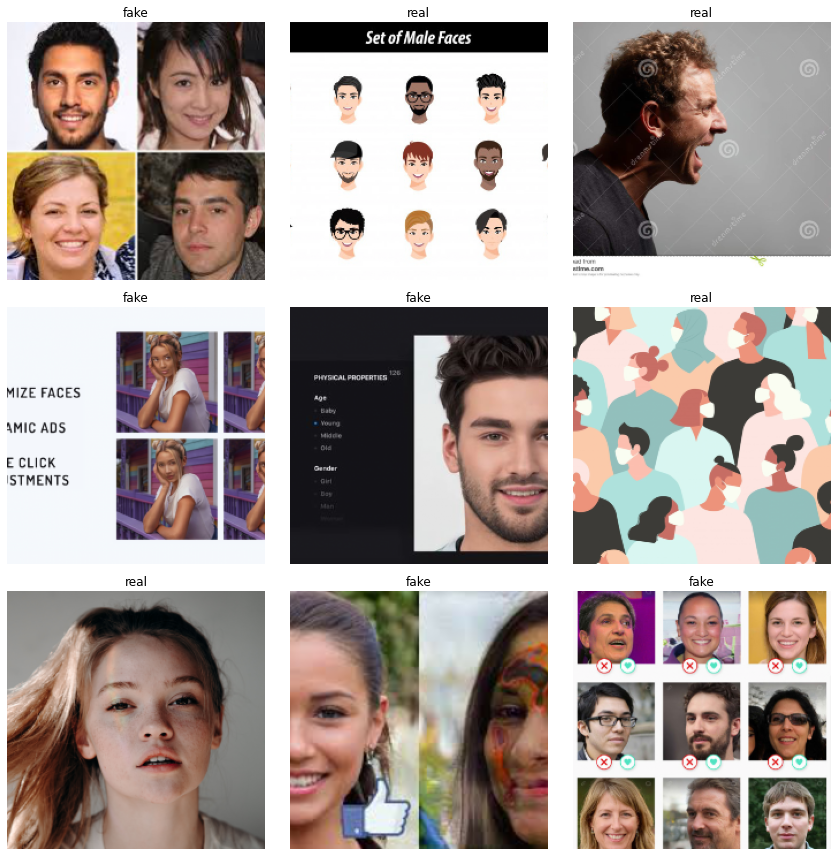

In [11]:
# bad pictures
data.show_batch(3)

In [9]:
fastai_model = create_cnn(data, models.resnet50, metrics=[accuracy])

In [10]:
%%time
fastai_model.fit_one_cycle(2)

CPU times: user 5.19 s, sys: 5.07 s, total: 10.3 s
Wall time: 4min 33s


In [12]:
%%time
fastai_model.fit_one_cycle(2)

CPU times: user 4.83 s, sys: 2.87 s, total: 7.69 s
Wall time: 35.1 s


In [13]:
%%time
fastai_model.fit_one_cycle(3)

CPU times: user 7.04 s, sys: 4.23 s, total: 11.3 s
Wall time: 49.5 s


In [14]:
fastai_model.save('stage-1')

In [15]:
fastai_model.unfreeze()

In [16]:
fastai_model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


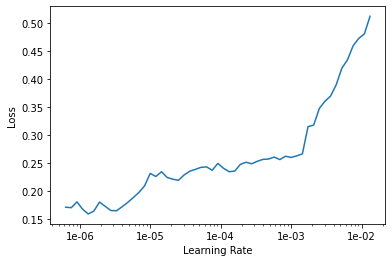

In [17]:
fastai_model.recorder.plot()

In [19]:
fastai_model.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

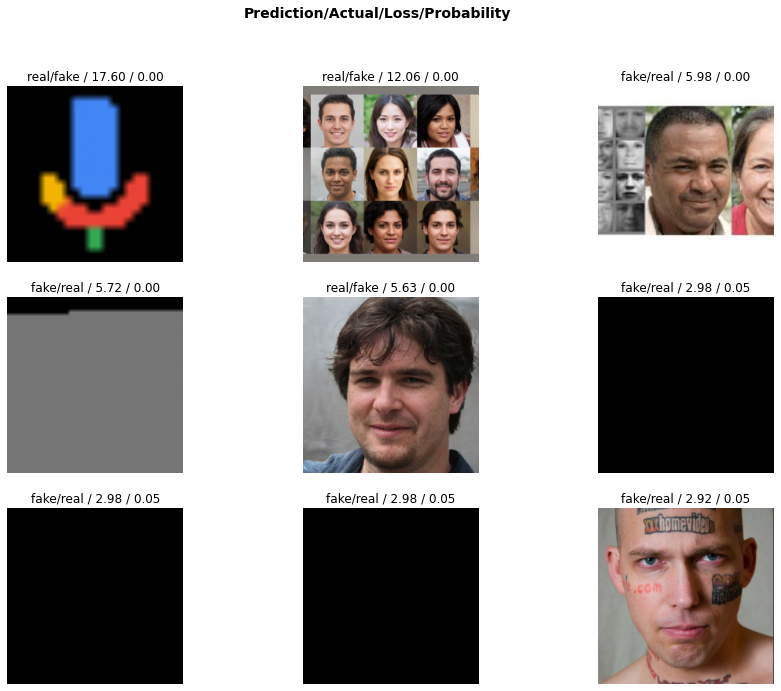

In [29]:
interp = ClassificationInterpretation.from_learner(fastai_model)
interp.plot_top_losses(9, figsize=(15,11))

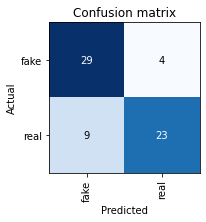

In [30]:
interp.plot_confusion_matrix(figsize=(3,3))

# Impressionism vs Neoclassicism


In [24]:
gdrive_path = Path('/content/drive/MyDrive/Colab Notebooks/fastai_hm/data/arts_style')
gdrive_path.ls()

[PosixPath('/content/drive/MyDrive/Colab Notebooks/fastai_hm/data/arts_style/train')]

In [25]:
data = ImageDataBunch.from_folder(gdrive_path, valid_pct=0.2, size=224).normalize(imagenet_stats)

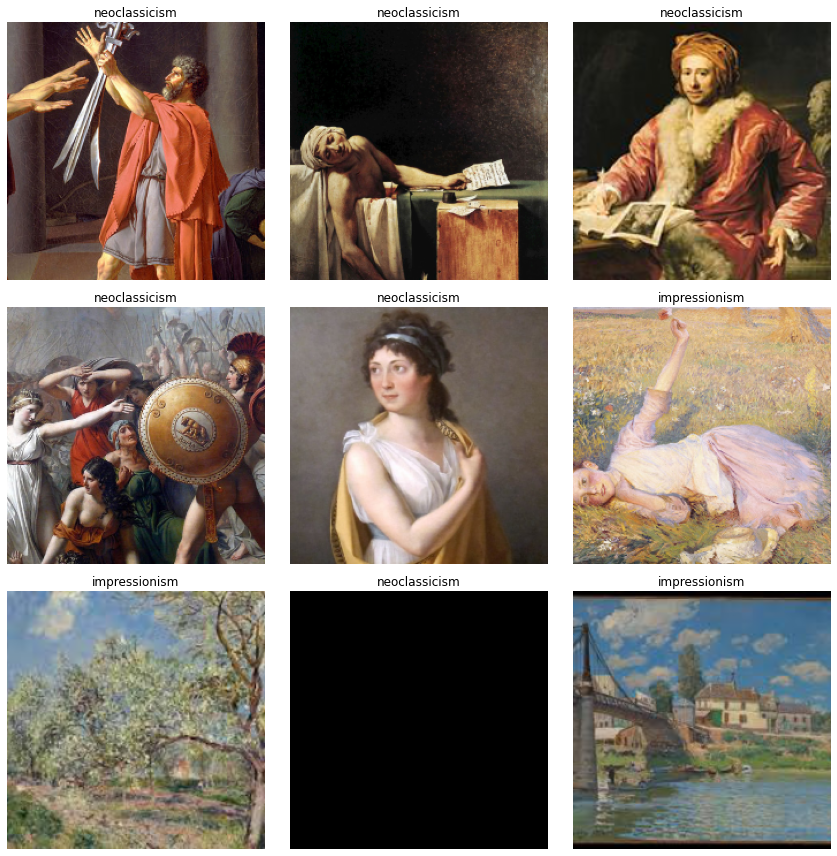

In [28]:
data.show_batch(3)

In [26]:
art_model = create_cnn(data, models.resnet50, metrics=[accuracy])

In [27]:
%%time
art_model.fit_one_cycle(2)

CPU times: user 4.8 s, sys: 4.28 s, total: 9.08 s
Wall time: 6min 10s


In [31]:
art_model.save('stage-1')
art_model.unfreeze()

In [32]:
art_model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


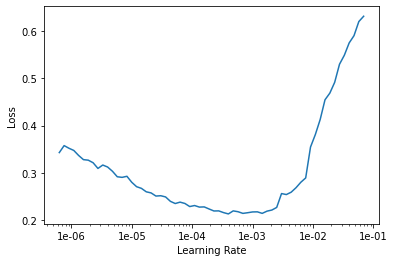

In [33]:
art_model.recorder.plot()

In [35]:
art_model.fit_one_cycle(2, max_lr=slice(1e-5,1e-2))

In [37]:
art_model.fit_one_cycle(2, max_lr=slice(1e-5,1e-2))

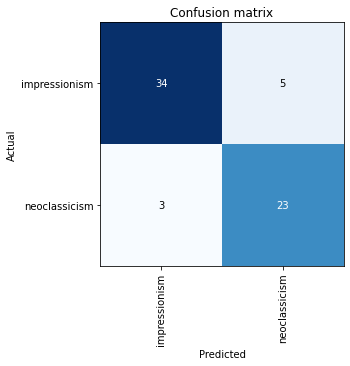

In [38]:
interp = ClassificationInterpretation.from_learner(art_model)
interp.plot_confusion_matrix(figsize=(5,5))

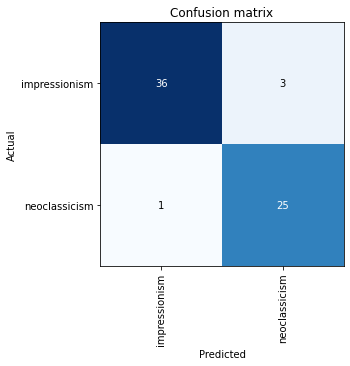

In [40]:
art_model.fit_one_cycle(2, max_lr=slice(1e-5,1e-2))
interp = ClassificationInterpretation.from_learner(art_model)
interp.plot_confusion_matrix(figsize=(5,5))